# Comparación de Métodos de Reducción de Dimensiones

In [1]:
# Librerías necesarias para manipulación de datos
import pandas as pd
from pathlib import Path

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Importación de Datos

Para esta demostración utilizaremos una versión limpia de los [datos de cáncer de mama compartidos en Kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset).

In [3]:
# Importa los datos en un DataFrame de Pandas
file_path = Path("../datos/breast_cancer_clean.csv")
cancer_df = pd.read_csv(file_path, index_col=0)

# Muestra un ejemplo de los datos
cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Elimina la columna "diagnosis" ya que representa la predicción del diagnóstico, y además, es una variable no numérica
data_clean = cancer_df.drop("diagnosis", axis=1)

# Muestra un ejemplo de los datos limpios
data_clean.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Estandarización de los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Crea una instancia de StandardScaler

# Estandariza los datos utilizando la instancia de StandarScaler
data_standardized = scaler.fit_transform(data_clean)

# Muestra los datos estandarizados
data_standardized[5]

array([-0.47637467, -0.8353353 , -0.38714807, -0.50565045,  2.23742148,
        1.24433549,  0.8663016 ,  0.82465565,  1.0054018 ,  1.89000504,
       -0.25507029, -0.59266165, -0.32130419, -0.28925822,  0.1563467 ,
        0.44554365,  0.1600252 , -0.06912355,  0.13411881,  0.48684584,
       -0.16549825, -0.31383633, -0.11500946, -0.24432021,  2.04851283,
        1.72161644,  1.2632432 ,  0.90588779,  1.75406939,  2.24180161])

In [10]:
# Define los colores para los puntos de los gráficos
dot_colors = cancer_df["diagnosis"].replace({'M': 1, 'B': 0})
dot_colors

id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
           ..
926424      1
926682      1
926954      1
927241      1
92751       0
Name: diagnosis, Length: 569, dtype: int64

## Funciones Auxiliares

In [14]:
# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
# Función para crear un gráfico en 2D
def grafico_2d(x, y, colores):
    plt.figure(figsize=(12, 6))
    plt.scatter(x, y, c=colores, alpha=0.7)
    plt.title("Reducción a 2 Componentes")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.show()
    
# Función para crear gráfico en 3D
def grafico_3d(x, y, z, colores):
    ax = plt.subplot(1, 2, 2, projection="3d")
    ax.scatter(x, y, z, c=colores, alpha=0.7)
    ax.set_title("Reducción a 3 Componentes")
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
    ax.set_zlabel("Componente 3")
    plt.show()

## Principal component analysis (PCA)

Documentación de [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) en scikit-learn.

In [12]:
# Importa PCA desde scikit-learn
from sklearn.decomposition import PCA

In [23]:
# PCA para 2 componentes
pca_2d = PCA(n_components=2)
pca_components_2d = pca_2d.fit_transform(data_standardized)

# PCA para 3 componentes
pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(data_standardized)

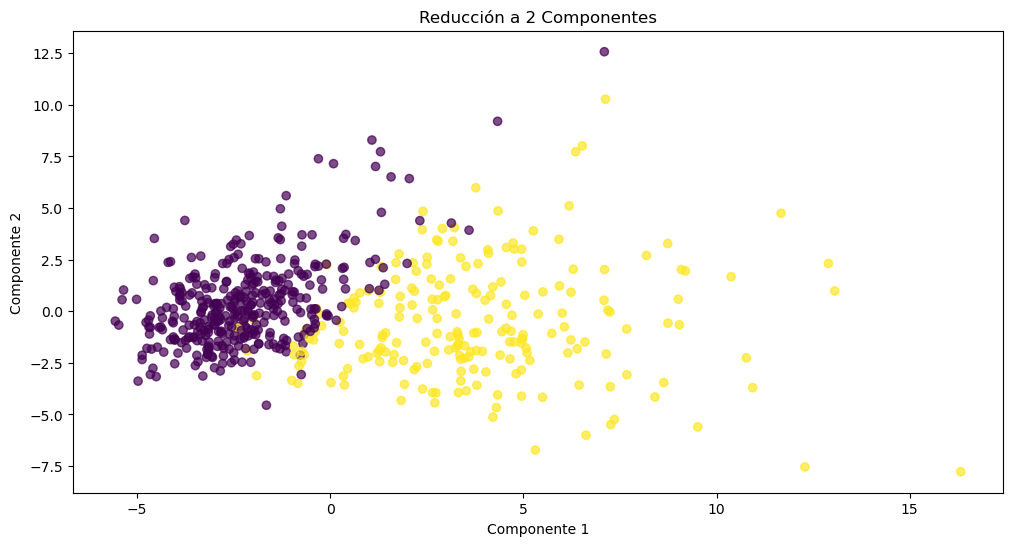

In [24]:
# Gráfico 2d
grafico_2d(pca_components_2d[:, 0], pca_components_2d[:, 1], dot_colors)

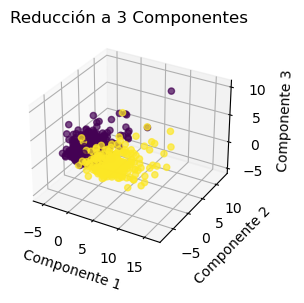

In [25]:
# Gráfico 3D
grafico_3d(pca_components_3d[:, 0], pca_components_3d[:, 1], pca_components_3d[:, 2], dot_colors)

# Multidimensional scaling (MDS)

Documentación [MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html) en scikit-learn.

In [22]:
# Importa MDS desde scikit-learn
from sklearn.manifold import MDS

In [26]:
# MDS para 2 componentes
mds_2d = MDS(n_components=2)
mds_components_2d = mds_2d.fit_transform(data_standardized)

# MDS para 3 componentes
mds_3d = MDS(n_components=3)
mds_components_3d = mds_3d.fit_transform(data_standardized)

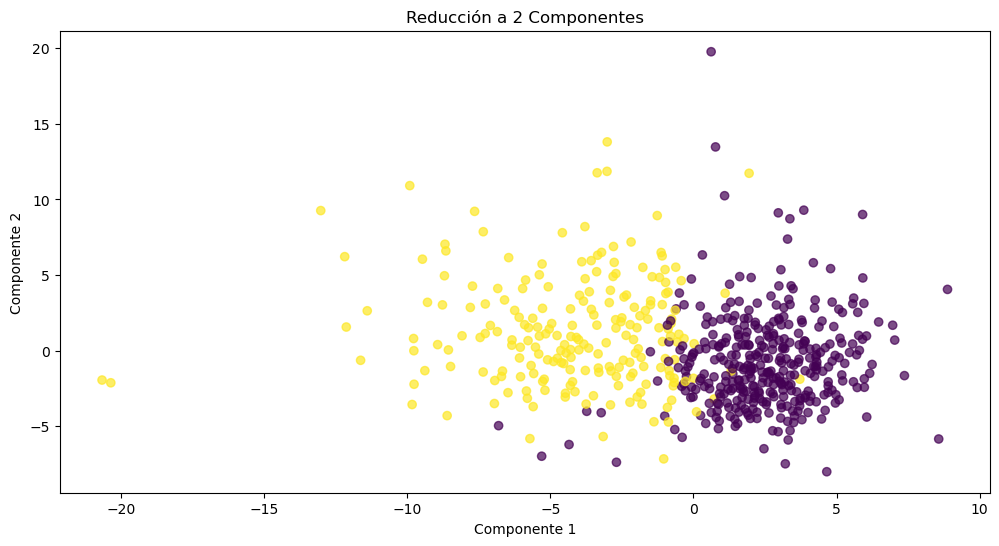

In [27]:
# Gráfico 2d
grafico_2d(mds_components_2d[:, 0], mds_components_2d[:, 1], dot_colors)

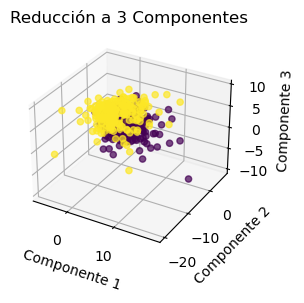

In [28]:
# Gráfico 3D
grafico_3d(mds_components_3d[:, 0], mds_components_3d[:, 1], mds_components_3d[:, 2], dot_colors)

## Isometric mapping (Isomap)

Documentación de [isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html) en scikit-learn.

In [29]:
# Importa isomap desde scikit-learn
from sklearn.manifold import Isomap

In [30]:
# Isomap para 2 componentes
isomap_2d = Isomap(n_components=2)
isomap_components_2d = isomap_2d.fit_transform(data_standardized)

# Isomap para 3 componentes
isomap_3d = Isomap(n_components=3)
isomap_components_3d = isomap_3d.fit_transform(data_standardized)

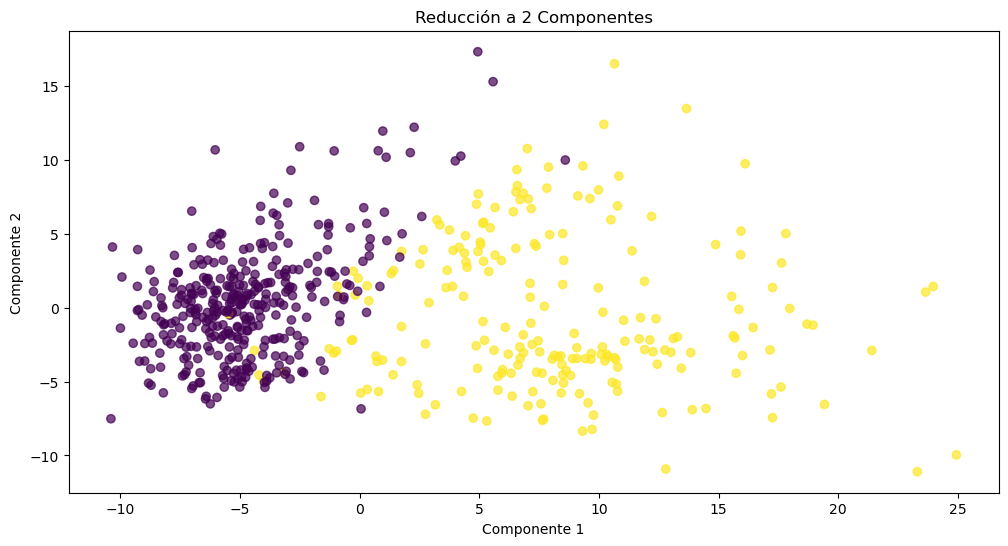

In [31]:
# Gráfico 2d
grafico_2d(isomap_components_2d[:, 0], isomap_components_2d[:, 1], dot_colors)

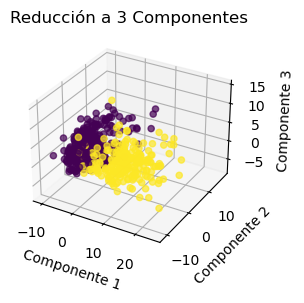

In [32]:
# Gráfico 3D
grafico_3d(isomap_components_3d[:, 0], isomap_components_3d[:, 1], isomap_components_3d[:, 2], dot_colors)

## Comparación de Métodos

In [42]:
# Librerías requeridas
import numpy as np
from sklearn.metrics import euclidean_distances

In [37]:
# Varianza explicada PCA
pca_explained_variance_2d = pca_2d.explained_variance_ratio_
pca_explained_variance_3d = pca_3d.explained_variance_ratio_

# Varianza explicada Isomap
isomap_explained_variance_2d = isomap_2d.explained_variance_ratio_
isomap_explained_variance_3d = isomap_3d.explained_variance_ratio_

AttributeError: 'Isomap' object has no attribute 'explained_variance_ratio_'

In [43]:
# Calidad de MDS
original_distances = euclidean_distances(data_standardized)
reduced_distances = euclidean_distances(mds_2d)

stress = np.sqrt(((original_distances - reduced_distances)**2).sum() / (original_distances**2).sum())

print("Stress: {:.4f}".format(stress))

TypeError: float() argument must be a string or a number, not 'MDS'

In [44]:
import numpy as np
from sklearn.manifold import MDS
from sklearn.metrics import euclidean_distances

# Step 1: Prepare your dataset
# For example purposes, I am creating a synthetic dataset with 5 dimensions
np.random.seed(42)
n_samples = 100
n_features = 5
X = np.random.rand(n_samples, n_features)

# Step 2: Apply MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

# Step 3: Estimate the quality of MDS (since true explained variance is not available)
# Computing the original and reduced distances
original_distances = euclidean_distances(X)
reduced_distances = euclidean_distances(X_mds)

# Calculating stress as a measure of dissimilarity between original and reduced distances
stress = np.sqrt(((original_distances - reduced_distances)**2).sum() / (original_distances**2).sum())

print("Reduced Data:\n", X_mds)
print("Stress: {:.4f}".format(stress))

Reduced Data:
 [[ 0.03284239 -0.53354839]
 [ 0.73387023  0.05945748]
 [ 0.06425844 -0.89186088]
 [-0.04129666 -0.22320837]
 [-0.29293276  0.25582319]
 [-0.50224619  0.2614205 ]
 [ 0.33737071  0.85409331]
 [-0.17775839  0.52609985]
 [ 0.09856854  0.52463972]
 [-0.27797374  0.09771618]
 [ 0.71319753  0.35551139]
 [-0.844379    0.24233018]
 [-0.19288659 -0.35165349]
 [ 0.66507693 -0.60576814]
 [-0.00257141  0.78776563]
 [-0.60396347 -0.04678815]
 [-0.58352896 -0.12940505]
 [ 0.30937958 -0.06269364]
 [ 0.50274735 -0.33907022]
 [-0.50769388 -0.33152154]
 [ 0.68442875 -0.12548582]
 [-0.29836168 -0.51967968]
 [ 0.64544543  0.14670873]
 [ 0.18869255  0.51770021]
 [-0.60502619 -0.27058408]
 [ 0.10440871 -0.7266024 ]
 [ 0.33588225  0.58301032]
 [ 0.52904502 -0.25546767]
 [-0.55082894  0.18381004]
 [-0.10161124 -0.69471094]
 [ 0.13080765  0.81730172]
 [ 0.30601632 -0.47227081]
 [-0.12049161 -0.32154946]
 [-0.68398033  0.19679871]
 [-0.45403165  0.346961  ]
 [ 0.18466847 -0.03411885]
 [-0.36964821